In [1]:
import pandas as pd
import numpy as n
import ROOT as R
import ctypes as ct
import math as mt
from array import array 
import sys

R.ROOT.EnableImplicitMT()

c1=R.TCanvas('c1','c1',900,700)
c1B=R.TCanvas('c1B','c1B',900,700)
c1F=R.TCanvas('c1F','c1F',900,700)

Welcome to JupyROOT 6.22/09


In [2]:
#Official data from Protezione Civile
urlByProvince = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
urlNational = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'
urlByRegion = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'


dfByProvince = pd.read_csv(urlByProvince,na_filter = False)
dfNational = pd.read_csv(urlNational)
dfByRegion = pd.read_csv(urlByRegion)

lastDate=dfNational['data'][len(dfNational)-1]

#dfByProvince.head(5)
#dfNational.head(5)

print("Last data %s"%lastDate)

Last data 2022-04-22T17:00:00


In [3]:
dfByRegion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16569 entries, 0 to 16568
Data columns (total 30 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   data                                    16569 non-null  object 
 1   stato                                   16569 non-null  object 
 2   codice_regione                          16569 non-null  int64  
 3   denominazione_regione                   16569 non-null  object 
 4   lat                                     16569 non-null  float64
 5   long                                    16569 non-null  float64
 6   ricoverati_con_sintomi                  16569 non-null  int64  
 7   terapia_intensiva                       16569 non-null  int64  
 8   totale_ospedalizzati                    16569 non-null  int64  
 9   isolamento_domiciliare                  16569 non-null  int64  
 10  totale_positivi                         16569 non-null  in

In [4]:
import datetime
date0='2015-01-01T00:00:00'
dt0=datetime.datetime.strptime(date0, "%Y-%m-%dT%H:%M:%S")
dfByRegion['DDAY_DAY'] = dfByRegion['data'].apply(lambda x: (datetime.datetime.strptime(x, "%Y-%m-%dT%H:%M:%S")-dt0).days)
days=n.unique(dfByRegion['DDAY_DAY'])
print(days)

[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033
 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047
 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061
 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075
 2076 

In [5]:
dfByRegion.head(10)
df1=dfByRegion[dfByRegion['codice_regione']==3]
df1.head(100)

data stato  codice_regione denominazione_regione  \
8     2020-02-24T18:00:00   ITA               3             Lombardia   
29    2020-02-25T18:00:00   ITA               3             Lombardia   
50    2020-02-26T18:00:00   ITA               3             Lombardia   
71    2020-02-27T18:00:00   ITA               3             Lombardia   
92    2020-02-28T18:00:00   ITA               3             Lombardia   
...                   ...   ...             ...                   ...   
2003  2020-05-29T17:00:00   ITA               3             Lombardia   
2024  2020-05-30T17:00:00   ITA               3             Lombardia   
2045  2020-05-31T17:00:00   ITA               3             Lombardia   
2066  2020-06-01T17:00:00   ITA               3             Lombardia   
2087  2020-06-02T17:00:00   ITA               3             Lombardia   

            lat      long  ricoverati_con_sintomi  terapia_intensiva  \
8     45.466794  9.190347                      76                 19   
29    45.466794  9.190347                      79                 25   
50    45.466794  9.190347                      79                 25   
71    45.466794  9.190347                     172                 41   
92    45.466794  9.190347                     235                 47   
...         ...       ...                     ...                ...   
2003  45.466794  9.190347                    3552                173   
2024  45.466794  9.190347                    3307                172   
2045  45.466794  9.190347                    3131                170   
2066  45.466794  9.190347                    3085                167   
2087  45.466794  9.190347                    3021                166   

      totale_ospedalizzati  isolamento_domiciliare  ...  \
8                       95                      71  ...   
29                     104                     127  ...   
50                     104                     145  ...   
71                     213                     136  ...   
92                     282                     192  ...   
...                    ...                     ...  ...   
2003                  3725                   18958  ...   
2024                  3479                   18330  ...   
2045                  3301                   17695  ...   
2066                  3252                   17609  ...   
2087                  3187                   17068  ...   

      ingressi_terapia_intensiva  note_test  note_casi  \
8                            NaN        NaN        NaN   
29                           NaN        NaN        NaN   
50                           NaN        NaN        NaN   
71                           NaN        NaN        NaN   
92                           NaN        NaN        NaN   
...                          ...        ...        ...   
2003                         NaN        NaN        NaN   
2024                         NaN        NaN        NaN   
2045                         NaN        NaN        NaN   
2066                         NaN        NaN        NaN   
2087                         NaN        NaN        NaN   

      totale_positivi_test_molecolare  totale_positivi_test_antigenico_rapido  \
8                                 NaN                                     NaN   
29                                NaN                                     NaN   
50                                NaN                                     NaN   
71                                NaN                                     NaN   
92                                NaN                                     NaN   
...                               ...                                     ...   
2003                              NaN                                     NaN   
2024                              NaN                                     NaN   
2045                              NaN                                     NaN   
2066                              NaN                          

In [6]:
from array import array
file = R.TFile("tree_ProtezioneCivile_4Livia_4thwave.root", 'RECREATE')
t = R.TTree('tPC', '')

DDAY_DAY = array('i', [0])
t.Branch('DDAY_DAY', DDAY_DAY, 'DDAY_DAY/I')
DEATHS = array('i', [0])
t.Branch('DEATHS', DEATHS, 'DEATHS/I')
REG = array('i', [0])
t.Branch('REG', REG, 'REG/I')

for index,row in dfByRegion.iterrows():
  #  if index>100:
  #      continue
    DDAY_DAY[0]=row['DDAY_DAY']
    DEATHS[0]=row['deceduti']
    REG[0]=row['codice_regione']
    t.Fill()
    print (index)
    
print("Writing file..")   
#file.cd()
#t.Write()
file.Write()
file.Close()
print(".. done")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076


3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857
3858
3859
3860
3861
3862
3863
3864
3865
3866
3867
3868
3869
3870
3871
3872
3873
3874
3875
3876
3877
3878
3879
3880
3881
3882
3883
3884
3885
3886
3887
3888
3889
3890
3891


5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728
5729
5730
5731
5732
5733
5734
5735
5736
5737
5738
5739
5740
5741
5742
5743
5744
5745
5746
5747
5748
5749
5750
5751
5752
5753


7266
7267
7268
7269
7270
7271
7272
7273
7274
7275
7276
7277
7278
7279
7280
7281
7282
7283
7284
7285
7286
7287
7288
7289
7290
7291
7292
7293
7294
7295
7296
7297
7298
7299
7300
7301
7302
7303
7304
7305
7306
7307
7308
7309
7310
7311
7312
7313
7314
7315
7316
7317
7318
7319
7320
7321
7322
7323
7324
7325
7326
7327
7328
7329
7330
7331
7332
7333
7334
7335
7336
7337
7338
7339
7340
7341
7342
7343
7344
7345
7346
7347
7348
7349
7350
7351
7352
7353
7354
7355
7356
7357
7358
7359
7360
7361
7362
7363
7364
7365
7366
7367
7368
7369
7370
7371
7372
7373
7374
7375
7376
7377
7378
7379
7380
7381
7382
7383
7384
7385
7386
7387
7388
7389
7390
7391
7392
7393
7394
7395
7396
7397
7398
7399
7400
7401
7402
7403
7404
7405
7406
7407
7408
7409
7410
7411
7412
7413
7414
7415
7416
7417
7418
7419
7420
7421
7422
7423
7424
7425
7426
7427
7428
7429
7430
7431
7432
7433
7434
7435
7436
7437
7438
7439
7440
7441
7442
7443
7444
7445
7446
7447
7448
7449
7450
7451
7452
7453
7454
7455
7456
7457
7458
7459
7460
7461
7462
7463
7464
7465


9105
9106
9107
9108
9109
9110
9111
9112
9113
9114
9115
9116
9117
9118
9119
9120
9121
9122
9123
9124
9125
9126
9127
9128
9129
9130
9131
9132
9133
9134
9135
9136
9137
9138
9139
9140
9141
9142
9143
9144
9145
9146
9147
9148
9149
9150
9151
9152
9153
9154
9155
9156
9157
9158
9159
9160
9161
9162
9163
9164
9165
9166
9167
9168
9169
9170
9171
9172
9173
9174
9175
9176
9177
9178
9179
9180
9181
9182
9183
9184
9185
9186
9187
9188
9189
9190
9191
9192
9193
9194
9195
9196
9197
9198
9199
9200
9201
9202
9203
9204
9205
9206
9207
9208
9209
9210
9211
9212
9213
9214
9215
9216
9217
9218
9219
9220
9221
9222
9223
9224
9225
9226
9227
9228
9229
9230
9231
9232
9233
9234
9235
9236
9237
9238
9239
9240
9241
9242
9243
9244
9245
9246
9247
9248
9249
9250
9251
9252
9253
9254
9255
9256
9257
9258
9259
9260
9261
9262
9263
9264
9265
9266
9267
9268
9269
9270
9271
9272
9273
9274
9275
9276
9277
9278
9279
9280
9281
9282
9283
9284
9285
9286
9287
9288
9289
9290
9291
9292
9293
9294
9295
9296
9297
9298
9299
9300
9301
9302
9303
9304


10713
10714
10715
10716
10717
10718
10719
10720
10721
10722
10723
10724
10725
10726
10727
10728
10729
10730
10731
10732
10733
10734
10735
10736
10737
10738
10739
10740
10741
10742
10743
10744
10745
10746
10747
10748
10749
10750
10751
10752
10753
10754
10755
10756
10757
10758
10759
10760
10761
10762
10763
10764
10765
10766
10767
10768
10769
10770
10771
10772
10773
10774
10775
10776
10777
10778
10779
10780
10781
10782
10783
10784
10785
10786
10787
10788
10789
10790
10791
10792
10793
10794
10795
10796
10797
10798
10799
10800
10801
10802
10803
10804
10805
10806
10807
10808
10809
10810
10811
10812
10813
10814
10815
10816
10817
10818
10819
10820
10821
10822
10823
10824
10825
10826
10827
10828
10829
10830
10831
10832
10833
10834
10835
10836
10837
10838
10839
10840
10841
10842
10843
10844
10845
10846
10847
10848
10849
10850
10851
10852
10853
10854
10855
10856
10857
10858
10859
10860
10861
10862
10863
10864
10865
10866
10867
10868
10869
10870
10871
10872
10873
10874
10875
10876
10877
10878
1087

12101
12102
12103
12104
12105
12106
12107
12108
12109
12110
12111
12112
12113
12114
12115
12116
12117
12118
12119
12120
12121
12122
12123
12124
12125
12126
12127
12128
12129
12130
12131
12132
12133
12134
12135
12136
12137
12138
12139
12140
12141
12142
12143
12144
12145
12146
12147
12148
12149
12150
12151
12152
12153
12154
12155
12156
12157
12158
12159
12160
12161
12162
12163
12164
12165
12166
12167
12168
12169
12170
12171
12172
12173
12174
12175
12176
12177
12178
12179
12180
12181
12182
12183
12184
12185
12186
12187
12188
12189
12190
12191
12192
12193
12194
12195
12196
12197
12198
12199
12200
12201
12202
12203
12204
12205
12206
12207
12208
12209
12210
12211
12212
12213
12214
12215
12216
12217
12218
12219
12220
12221
12222
12223
12224
12225
12226
12227
12228
12229
12230
12231
12232
12233
12234
12235
12236
12237
12238
12239
12240
12241
12242
12243
12244
12245
12246
12247
12248
12249
12250
12251
12252
12253
12254
12255
12256
12257
12258
12259
12260
12261
12262
12263
12264
12265
12266
1226

13509
13510
13511
13512
13513
13514
13515
13516
13517
13518
13519
13520
13521
13522
13523
13524
13525
13526
13527
13528
13529
13530
13531
13532
13533
13534
13535
13536
13537
13538
13539
13540
13541
13542
13543
13544
13545
13546
13547
13548
13549
13550
13551
13552
13553
13554
13555
13556
13557
13558
13559
13560
13561
13562
13563
13564
13565
13566
13567
13568
13569
13570
13571
13572
13573
13574
13575
13576
13577
13578
13579
13580
13581
13582
13583
13584
13585
13586
13587
13588
13589
13590
13591
13592
13593
13594
13595
13596
13597
13598
13599
13600
13601
13602
13603
13604
13605
13606
13607
13608
13609
13610
13611
13612
13613
13614
13615
13616
13617
13618
13619
13620
13621
13622
13623
13624
13625
13626
13627
13628
13629
13630
13631
13632
13633
13634
13635
13636
13637
13638
13639
13640
13641
13642
13643
13644
13645
13646
13647
13648
13649
13650
13651
13652
13653
13654
13655
13656
13657
13658
13659
13660
13661
13662
13663
13664
13665
13666
13667
13668
13669
13670
13671
13672
13673
13674
1367

15211
15212
15213
15214
15215
15216
15217
15218
15219
15220
15221
15222
15223
15224
15225
15226
15227
15228
15229
15230
15231
15232
15233
15234
15235
15236
15237
15238
15239
15240
15241
15242
15243
15244
15245
15246
15247
15248
15249
15250
15251
15252
15253
15254
15255
15256
15257
15258
15259
15260
15261
15262
15263
15264
15265
15266
15267
15268
15269
15270
15271
15272
15273
15274
15275
15276
15277
15278
15279
15280
15281
15282
15283
15284
15285
15286
15287
15288
15289
15290
15291
15292
15293
15294
15295
15296
15297
15298
15299
15300
15301
15302
15303
15304
15305
15306
15307
15308
15309
15310
15311
15312
15313
15314
15315
15316
15317
15318
15319
15320
15321
15322
15323
15324
15325
15326
15327
15328
15329
15330
15331
15332
15333
15334
15335
15336
15337
15338
15339
15340
15341
15342
15343
15344
15345
15346
15347
15348
15349
15350
15351
15352
15353
15354
15355
15356
15357
15358
15359
15360
15361
15362
15363
15364
15365
15366
15367
15368
15369
15370
15371
15372
15373
15374
15375
15376
1537

In [9]:
myNewFile = R.TFile.Open("tree_ProtezioneCivile_4Livia_4thwave.root")
myNewTreeT = myNewFile.Get('tPC')
regs=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
h1_tot=R.TH1F("h1_tot","h1_tot",788,1880,2668)
h1_nord=R.TH1F("h1_nord","h1_nord",788,1880,2668)
h1_centro=R.TH1F("h1_centro","h1_centro",788,1880,2668)
h1_sud=R.TH1F("h1_sud","h1_sud",788,1880,2668)
for i in regs:
    print(i)
    h2=R.TH2F("h2_%d"%i,"h2_%d"%i,788,1880,2668,50000,0,50000)
    
    myNewTreeT.Draw("DEATHS:DDAY_DAY>>h2_%d"%i, "REG==%d"%i)
    h1_old=h2.ProfileX()
    h1_new=R.TH1F("h1_%d"%i,"h1_%d"%i,788,1880,2668)
    for j in range(0,788):
        h1_new.SetBinContent(j+1,h1_old.GetBinContent(j+1)-h1_old.GetBinContent(j))
    if(i<9):
        h1_nord.Add(h1_new)
    elif (i>8 and i< 13):
        h1_centro.Add(h1_new)
    else:
        h1_sud.Add(h1_new)
    h1_tot.Add(h1_new)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


TH1.Print Name  = h1_tot, Entries= 15760, Total sum= 159264


Info in <TCanvas::Print>: png file Plots/PC.ITALY.cumulative_4thwave.png has been created


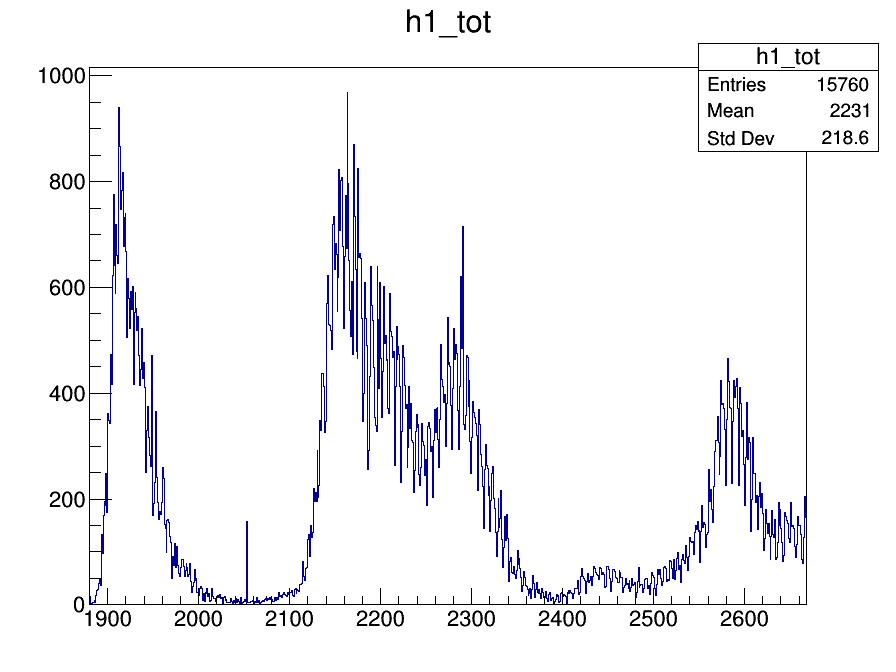

In [10]:
h1_tot.Print()
c1.cd()
#h1_tot.Rebin(2)
h1_tot.Draw("hist")
c1.Draw()
c1.SaveAs("Plots/PC.ITALY.cumulative_4thwave.png")

In [11]:
f = R.TFile("histos_ProtezioneCivile_4Livia_4thwave.root", 'RECREATE')

h1_tot.Write()
h1_nord.Write()
h1_centro.Write()
h1_sud.Write()
f.Write()
f.Close()

TH1.Print Name  = h1_tot, Entries= 15760, Total sum= 159264


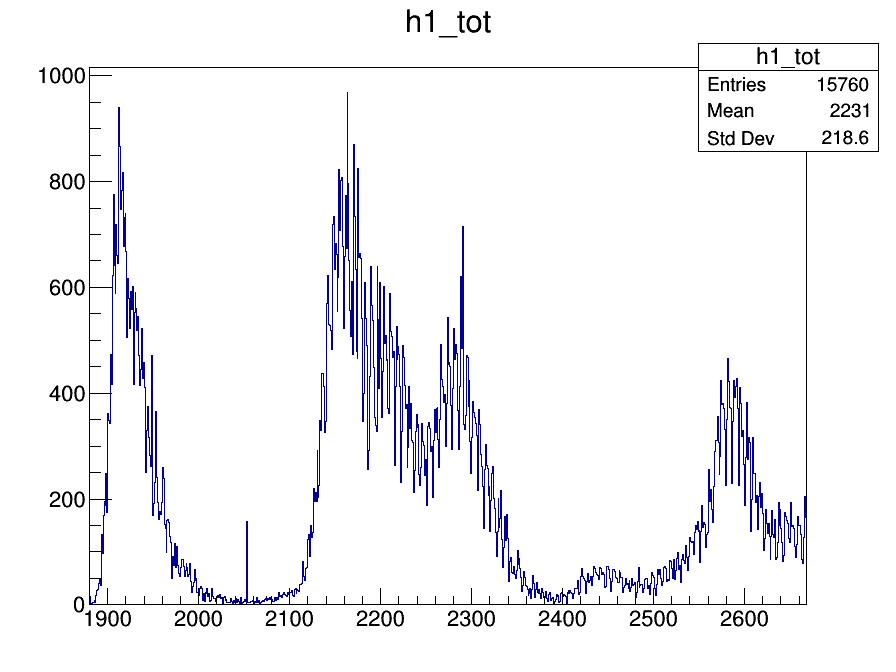

In [12]:
f = R.TFile("histos_ProtezioneCivile_4Livia_4thwave.root")
hpr=f.Get("h1_tot")
h1_tot.Print()
c1.cd()
#h1_tot.Rebin(2)
hpr.Draw("hist")
c1.Draw()